In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Read data from file and store it in lists

In [2]:
file_path = '/nfs/students/summer-term-2018/project_2/data/CelebA/Anno/list_attr_celeba.txt'
file = Path(file_path)

# Read lines from file
with open(file, 'r') as f:
    lines = f.readlines()
# Remove whitespace characters at beginning & end
lines = [line.strip() for line in lines]
# Separate strings
lines = [line.split() for line in lines]
# Remove first line and separate header
attributes = lines[1]
lines = lines[2:]
# Convert attribute strings into numbers
file_names = [line[0] for line in lines]
data = [list(map(int, line[1:])) for line in lines]

## Extract attributes of preprocessed images

In [5]:
file_path_preprocessed = '/nfs/students/summer-term-2018/project_2/data/CelebA/images_preprocessed.txt'
file_preprocessed = Path(file_path_preprocessed)

# Read lines from file
with open(file_preprocessed, 'r') as f:
    lines = f.readlines()
# Remove '.img' at the end
lines = [line.strip('.jpg\n') for line in lines]
# Convert file names into indices
indices = list(map(int, lines))
# Subtract 1: Indices start at 0
indices = list(map(lambda x: x-1, indices))

# Process data

In [7]:
data = np.array(data)
data = np.where(data==1, 1, 0)
processed_data = data[indices]
summed_attributes = np.sum(data, axis=0)
summed_attributes_preprocessed = np.sum(processed_data, axis=0)

# Invert data: beard -> no beard

data_inv = -(data-1)
data_inv = np.where(data_inv==1, 1, 0)

summed_attributes_inv = np.sum(data_inv, axis=0)
summed_attributes_preprocessed_inv = np.sum(data_inv[indices], axis=0)

In [12]:
np.save('/nfs/students/summer-term-2018/project_2/data/CelebA/attributes.npy', processed_data)

# Plot data

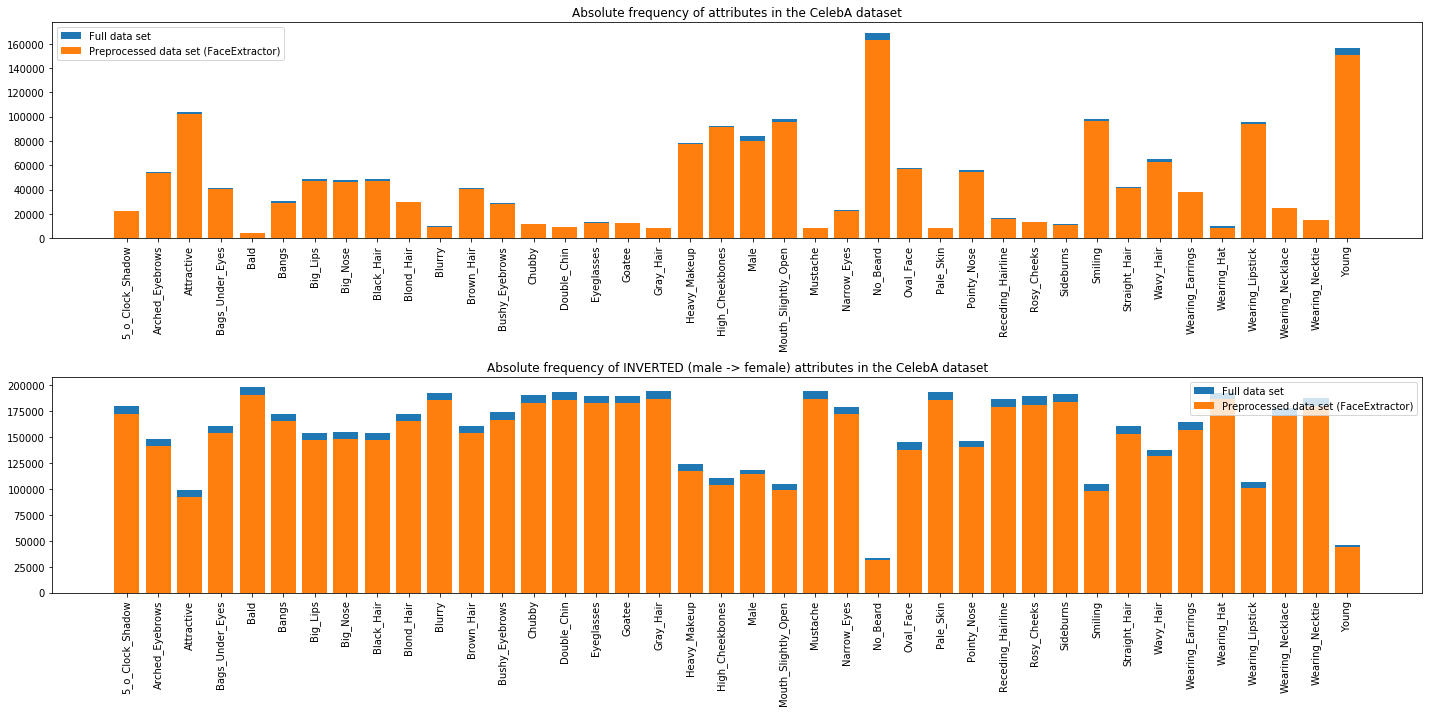

In [5]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

# Normal histo
ax[0].bar(range(len(summed_attributes)), summed_attributes, label='Full data set')
ax[0].bar(range(len(summed_attributes)), summed_attributes_preprocessed, label='Preprocessed data set (FaceExtractor)')
ax[0].set_xticks(range(len(summed_attributes)))
ax[0].set_xticklabels(attributes, rotation='vertical')
ax[0].set_title('Absolute frequency of attributes in the CelebA dataset')
ax[0].legend()

# Inverted histo
ax[1].bar(range(len(summed_attributes)), summed_attributes_inv, label='Full data set')
ax[1].bar(range(len(summed_attributes)), summed_attributes_preprocessed_inv, label='Preprocessed data set (FaceExtractor)')
ax[1].set_xticks(range(len(summed_attributes)))
ax[1].set_xticklabels(attributes, rotation='vertical')
ax[1].set_title('Absolute frequency of INVERTED (male -> female) attributes in the CelebA dataset')
ax[1].legend()
fig.tight_layout()
plt.show()

# Relative number of samples after preprocessing ordered by attributes

In [6]:
rel_frequency = summed_attributes_preprocessed / summed_attributes
rel_frequency_inv = summed_attributes_preprocessed_inv / summed_attributes_inv

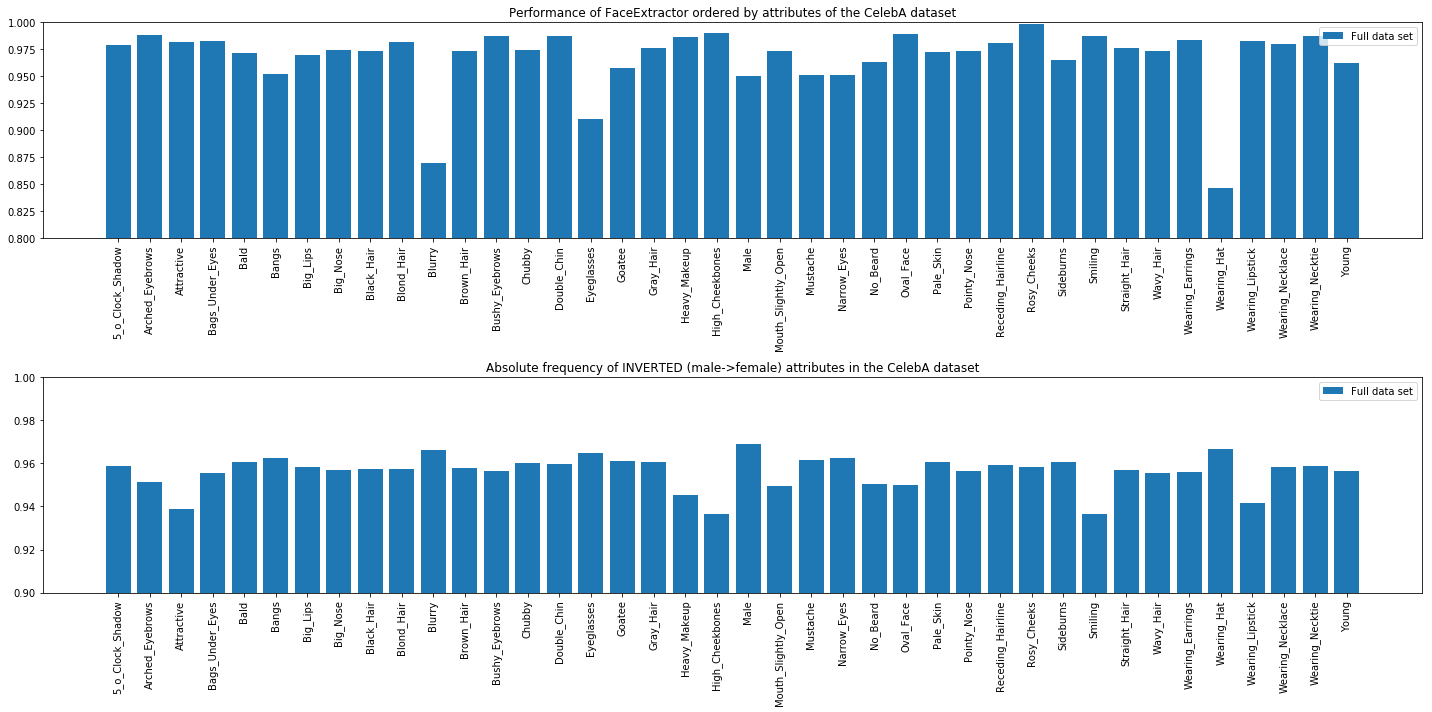

In [7]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

# Normal histo
ax[0].bar(range(len(rel_frequency)), rel_frequency, label='Full data set')
ax[0].set_ylim([0.8,1])
ax[0].set_xticks(range(len(summed_attributes)))
ax[0].set_xticklabels(attributes, rotation='vertical')
ax[0].set_title('Performance of FaceExtractor ordered by attributes of the CelebA dataset')
ax[0].legend()

# Inverted histo
ax[1].bar(range(len(rel_frequency_inv)), rel_frequency_inv, label='Full data set')
ax[1].set_ylim([0.9,1])
ax[1].set_xticks(range(len(summed_attributes)))
ax[1].set_xticklabels(attributes, rotation='vertical')
ax[1].set_title('Absolute frequency of INVERTED (male->female) attributes in the CelebA dataset')
ax[1].legend()
fig.tight_layout()
plt.show()